In [11]:
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 15.9 MB/s eta 0:00:0000:0100:01


In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import os

In [7]:
spl_model = tf.keras.models.load_model("Models/vgg16/finetuning_vgg16_cnn_100_epochs.h5")

In [8]:
spl_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

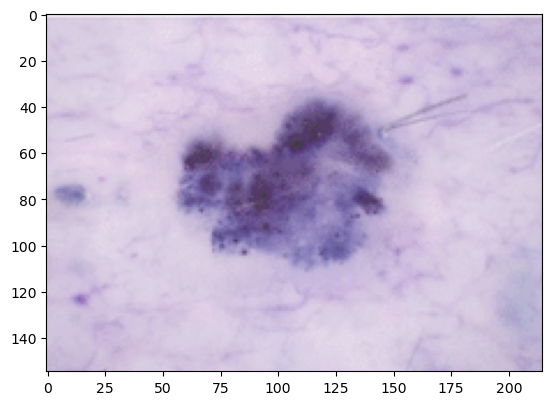

In [85]:
image = cv2.imread("Dataset/2023-05-27_01-09.png")
plt.imshow(image)
plt.show()

In [82]:
image.shape

(155, 215, 3)

In [89]:
IMAGE_SIZE = (150, 150)
image = cv2.resize(test_img, IMAGE_SIZE)
image.shape

(150, 150, 3)

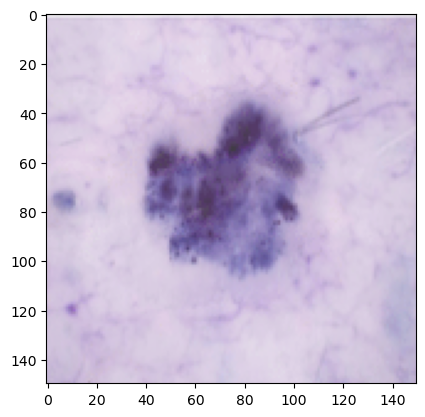

In [90]:
plt.imshow(image)
plt.show()

In [91]:
image_array = np.array(image)/255.0 # Normalize array values to 0-1
image_array = image_array[np.newaxis, ...]
image_array.shape

(1, 150, 150, 3)

In [92]:
result = spl_model.predict(image_array)
result.shape

1/1 [==============================] - 0s 77ms/step


(1, 6)

In [93]:
result

array([[5.0263620e-20, 1.4096484e-23, 8.3861048e-26, 1.3506851e-06,
        4.9573369e-04, 9.9950290e-01]], dtype=float32)

In [94]:
predicted_label_index = np.argmax(result)
predicted_label_index

5